# Competition notebook for paddy-disease-classification

## Setup

In [3]:
from fastai.imports import *
np.set_printoptions(linewidth=130)

In [35]:
import kagglehub

path = kagglehub.dataset_download("imbikramsaha/paddy-doctor")

path = Path(path + '/paddy-disease-classification')

In [ ]:
from fastai.vision.all import *

trn_path = Path(path + '/train_images')
tst_path = Path(path + '/test_images')

(480, 640)


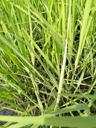

In [ ]:
train_files = get_image_files(trn_path)
img = PILImage.create(train_files[0])
print(img.size)
img.to_thumb(128)

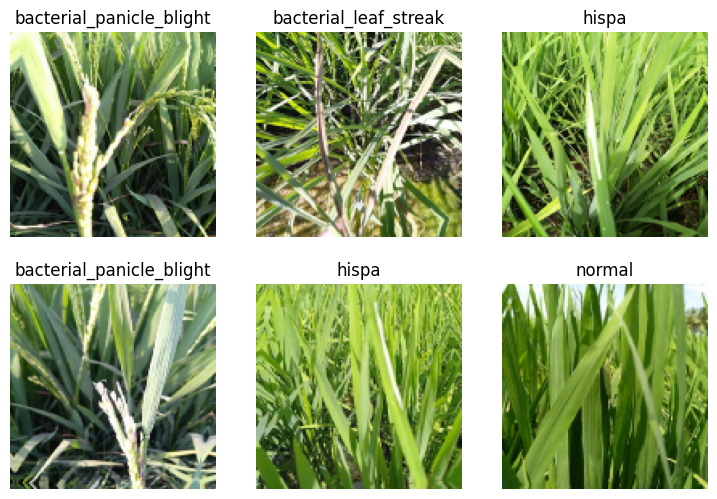

In [8]:
dls = ImageDataLoaders.from_folder(
    trn_path, 
    valid_pct=0.2, 
    seed=42,
    item_tfms=Resize(480, method='squish'),
    batch_tfms=aug_transforms(size=128, min_scale=0.75)
)

dls.show_batch(max_n=6)

In [17]:
def show_gpu_stats():
    print(f"GPU utilization:")
    !nvidia-smi --query-gpu=utilization.gpu,memory.used,memory.total --format=csv,noheader,nounits
    
# Add callback to monitor during training
from fastai.callback.tracker import TrackerCallback

class GPUMonitorCallback(TrackerCallback):
    def after_batch(self):
        show_gpu_stats()

In [ ]:
learn = vision_learner(
    dls, 
    'resnet26d', 
    metrics=error_rate, 
    path='.',
    cbs=[GPUMonitorCallback()]
).to_fp16()

c:\src\mrcn-zmnsk-playground\.venv\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\src\mrcn-zmnsk-playground\.venv\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0006918309954926372, slide=0.00363078061491251)

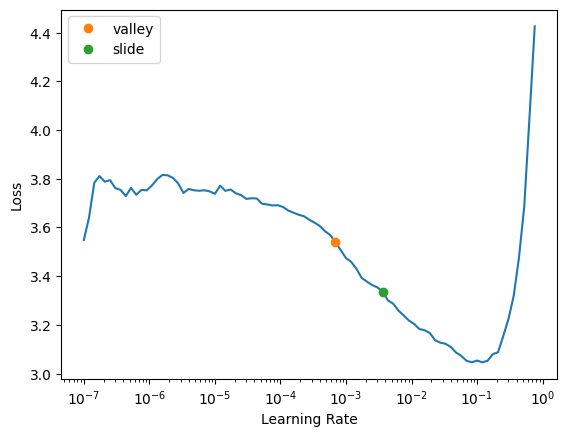

In [10]:
learn.lr_find(suggest_funcs=(valley, slide))

In [19]:
learn.fine_tune(3, 0.01)

c:\src\mrcn-zmnsk-playground\.venv\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\src\mrcn-zmnsk-playground\.venv\Lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,1.794126,1.312257,0.409899,02:56


GPU utilization:
37, 2662, 6144
GPU utilization:
27, 2702, 6144
GPU utilization:
27, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
24, 2702, 6144
GPU utilization:
24, 2702, 6144
GPU utilization:
19, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
14, 2702, 6144
GPU utilization:
18, 2702, 6144
GPU utilization:
25, 2702, 6144
GPU utilization:
25, 2702, 6144
GPU util

epoch,train_loss,valid_loss,error_rate,time
0,1.154537,0.791869,0.255166,04:49
1,0.787833,0.484405,0.159058,03:07
2,0.553302,0.391625,0.122057,02:55


GPU utilization:
6, 2702, 6144
GPU utilization:
29, 2878, 6144
GPU utilization:
16, 2878, 6144
GPU utilization:
15, 2880, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
15, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
4, 2892, 6144
GPU utilization:
12, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utilization:
16, 2892, 6144
GPU utiliz

In [ ]:
# 4x size reduction for speed
trn_path_sml = path / 'train_images_sml'
resize_images(trn_path, dest=trn_path_sml, max_size=256, recurse=True)
trn_path = trn_path_sml

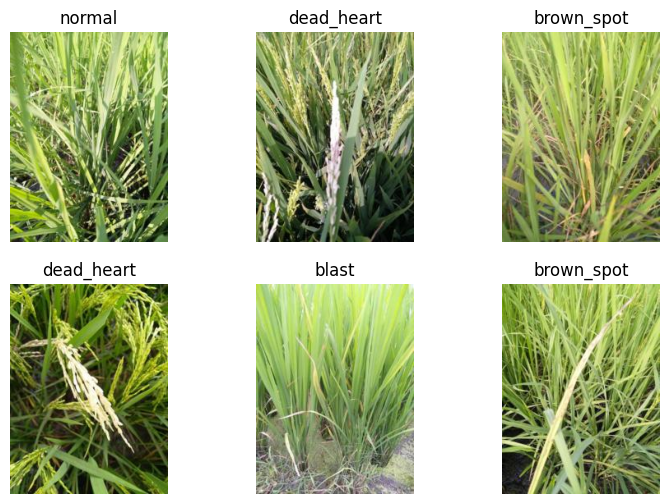

In [45]:
dls = ImageDataLoaders.from_folder(
    trn_path, 
    valid_pct=0.2, 
    seed=42,
    item_tfms=Resize((256,192), method=ResizeMethod.Pad),
)

dls.show_batch(max_n=6)

In [85]:
def train(architecture, item_transformations, batch_tranformations, epochs=5, accumulate_gradient_batches=1) -> Learner:
    batch_size = 64
    dls = ImageDataLoaders.from_folder(
        trn_path, 
        seed=42, 
        valid_pct=0.2, 
        item_tfms=item_transformations, 
        batch_tfms=batch_tranformations,
        bs=batch_size//accumulate_gradient_batches
    )
    learn = vision_learner(
        dls, 
        architecture, 
        metrics=error_rate,
        cbs=[ GradientAccumulation(batch_size)]
    ).to_fp16()
    learn.fine_tune(epochs, 0.01)
    return learn

In [ ]:
import gc
def report_gpu():
    print(torch.cuda.list_gpu_processes())
    gc.collect()
    torch.cuda.empty_cache()

### LightningAI

In the scale up phase, I switched to LightningAI to leverage their managed infrastructure for training larger models efficiently.
Any of the below takes ~1h on my laptop RTX 3000, while closer to 10min in the cloud.

Like Jeremy, I took a handful of models from their [The best vision models for fine-tuning](https://www.kaggle.com/code/jhoward/the-best-vision-models-for-fine-tuning) analysis.

I tried finetuning in 12 epochs:
 - convnext large : 98.156%  -> that'd be 178 / 657 private leaderboard (public evaluation not available)
 - convnext small : 98.041%
 - swinV2 large : 98.041%


In [ ]:
archicture = 'convnext_small_in22k'

gc.collect()
torch.cuda.empty_cache()

learn = train(
    archicture,
    epochs=1,
    item_transformations=Resize((256,192), method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
    batch_tranformations=aug_transforms(size=(171,128), min_scale=0.75),
    accumulate_gradient_batches=16
)
report_gpu()

In [78]:
tst_files = get_image_files( path / 'test_images').sorted()
tst_dl = dls.test_dl(tst_files)
len(tst_files)

3469

In [77]:
learn.save('convnext-small-10-epochs')

Path('C:/Users/marcinzi/.cache/kagglehub/datasets/imbikramsaha/paddy-doctor/versions/1/paddy-disease-classification/train_images_sml/models/convnext-small-10-epochs.pth')

In [ ]:
preds = learn.get_preds(dl=tst_dl, with_decoded=True)


In [ ]:
# Check test files count
print(f"Test files count: {len(tst_files)}")
print(f"Probs length: {len(probs)}")

# Check test dataloader size
print(f"Test dataloader length: {len(tst_dl)}")
#print(f"Test dataloader batch size: {tst_dl.batch_size}")



Test files count: 3469
Test dataloader length: 55


In [ ]:
tta_preds,_ = learn.tta(dl=learn.dls.valid)
best_ = tta_preds.argmax(dim=1)


In [56]:
vocab_map = dict(enumerate(dls.vocab))
labels = pd.Series(idxs.numpy(), name='idxs').map(vocab_map)

frame = pd.DataFrame({'image_id': [f.name for f in tst_files], 'label': labels})
frame.to_csv('submission.csv', index=False)

In [ ]:
from kaggle import api
from pprint import pprint

comp = 'imbikramsaha/paddy-doctor'
api.competition_submit('submission.csv', 'convnext_small_in22k 5 epochs', comp)

last_score = api.competition_submissions(comp)[0]
pprint(last_score, width=80, indent=2)

In [33]:
import torch

torch.cuda.is_available()

True